In [2]:
import matplotlib.pyplot as plt
from src.FunctionsNetworkPlot import *

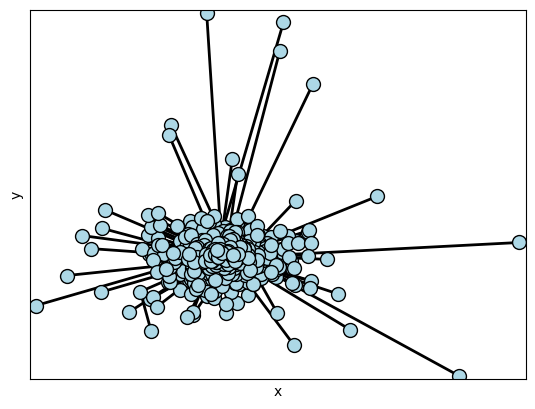

In [2]:
N = 10000
dim = [1,2,3]
alpha_a = 2.0
alpha_g = 2.0
filename = 'gml_1089891.gml.gz'
edges, nodes_positions = positions_GML(N, 2, alpha_a, alpha_g,filename)

# Crie a figura e o eixo
fig, ax = plt.subplots()

# Crie um grafo
G = nx.Graph()

# Adicione nós com as posições 2D extraídas das coordenadas 3D
for node, pos in nodes_positions.items():
    # Apenas extraia as coordenadas x e y
    G.add_node(node, pos=(pos[0], pos[1]))

pos = nx.get_node_attributes(G, 'pos')
# Defina as arestas

G.add_edges_from(edges)

# Extraia as posições 2D para a visualização
pos = nx.get_node_attributes(G, 'pos')

# Desenhe o grafo com contorno nos nós usando funções específicas
nx.draw_networkx_edges(G, pos, edge_color='black',width=2.0)

# Desenhe os nós com contorno
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue', edgecolors='black')

# Adicione os eixos e as grades
ax.set_xlabel('x')
ax.set_ylabel('y')

# Ajuste os limites dos eixos
x_min, x_max = min(x for x, y in pos.values()) - 1, max(x for x, y in pos.values()) + 1
y_min, y_max = min(y for x, y in pos.values()) - 1, max(y for x, y in pos.values()) + 1

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Adicione ticks aos eixos x e y
ax.set_xticks(range(int(x_min), int(x_max) + 1))
ax.set_yticks(range(int(y_min), int(y_max) + 1))

# Mostre o gráfico
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/N_10000/dim_2/alpha_a_2.0_alpha_g_1.0/gml/'

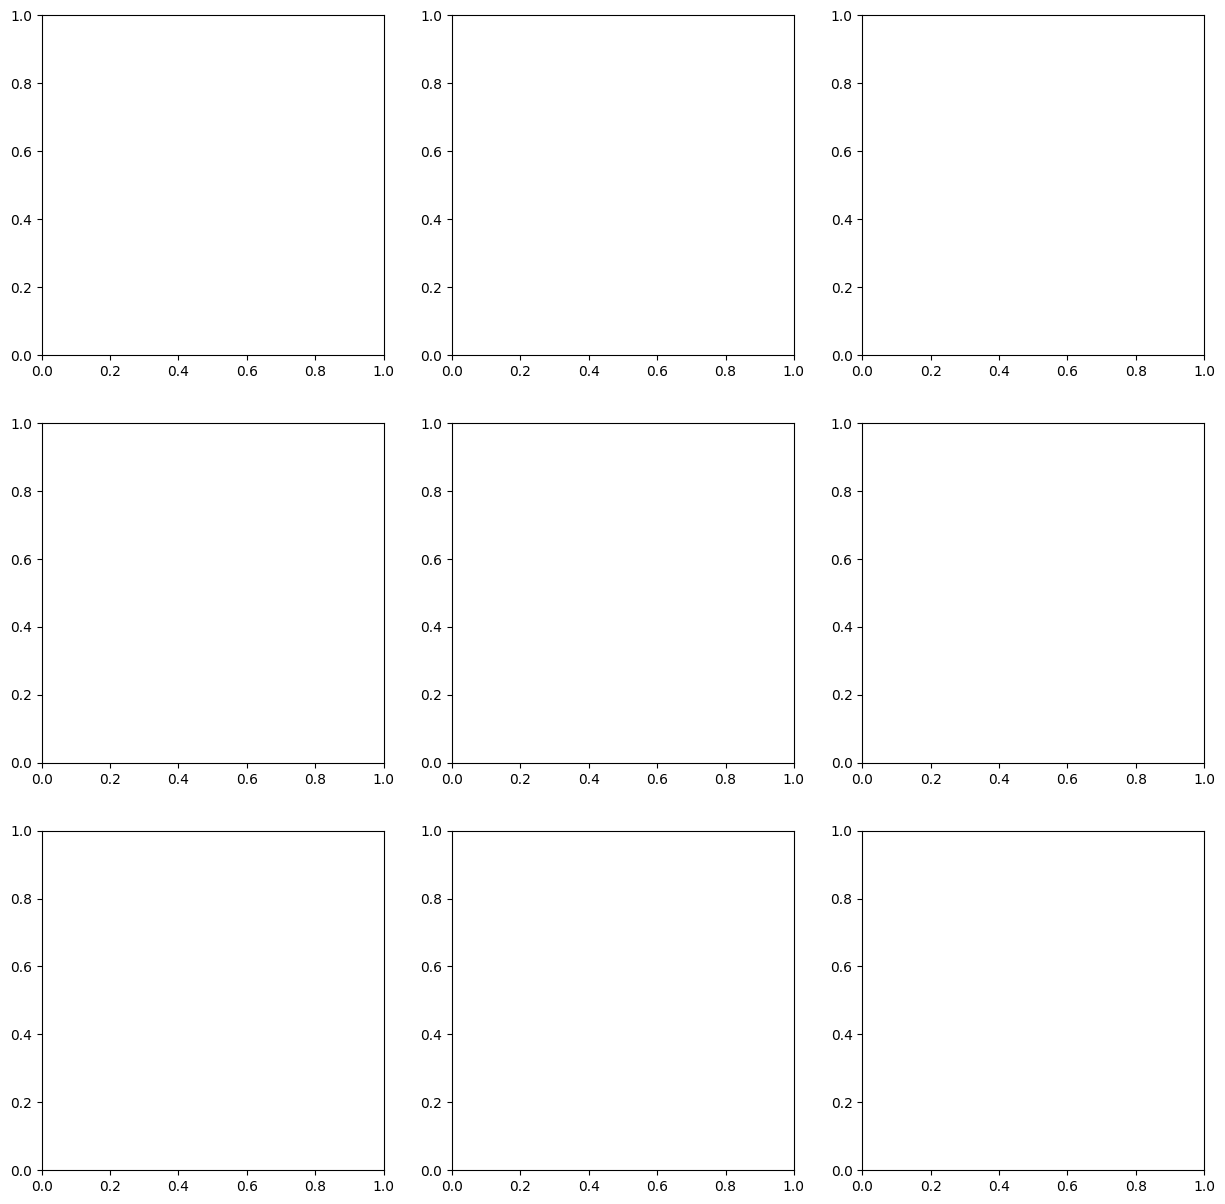

In [3]:
# Crie a figura e a grade de subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Defina grafos e posições para cada subplot
graphs = []
positions = []
titles = []

N = 10**4
alpha_a_f = 2.0
alpha_g_v = [1.0 ,2.0, 3.0,
           4.0, 5.0, 6.0, 
           7.0, 8.0, 9.0]
dim = 2

for i in range(9):
    # Crie um grafo
    G = nx.Graph()
    fn = select_first_gml_gz_file(N, dim, alpha_a_f, alpha_g_v[i])
    edges, nodes_positions = positions_GML(N, dim, alpha_a_f, alpha_g_v[i],fn)
    
    # Adicione nós com as posições 2D extraídas das coordenadas 3D
    for node, pos in nodes_positions.items():
        # Apenas extraia as coordenadas x e y
        G.add_node(node, pos=(pos[0], pos[1]))

    pos = nx.get_node_attributes(G, 'pos')
    # Defina as arestas

    G.add_edges_from(edges)
    
    graphs.append(G)
    positions.append(pos)
    titles.append(rf'$\alpha_g =  {alpha_g_v[i]}$')

# Preencha cada subplot com um grafo
for ax, G, pos, title in zip(axs.flat, graphs, positions, titles):
    draw_graph(ax, G, pos, title)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostre o gráfico
plt.show()

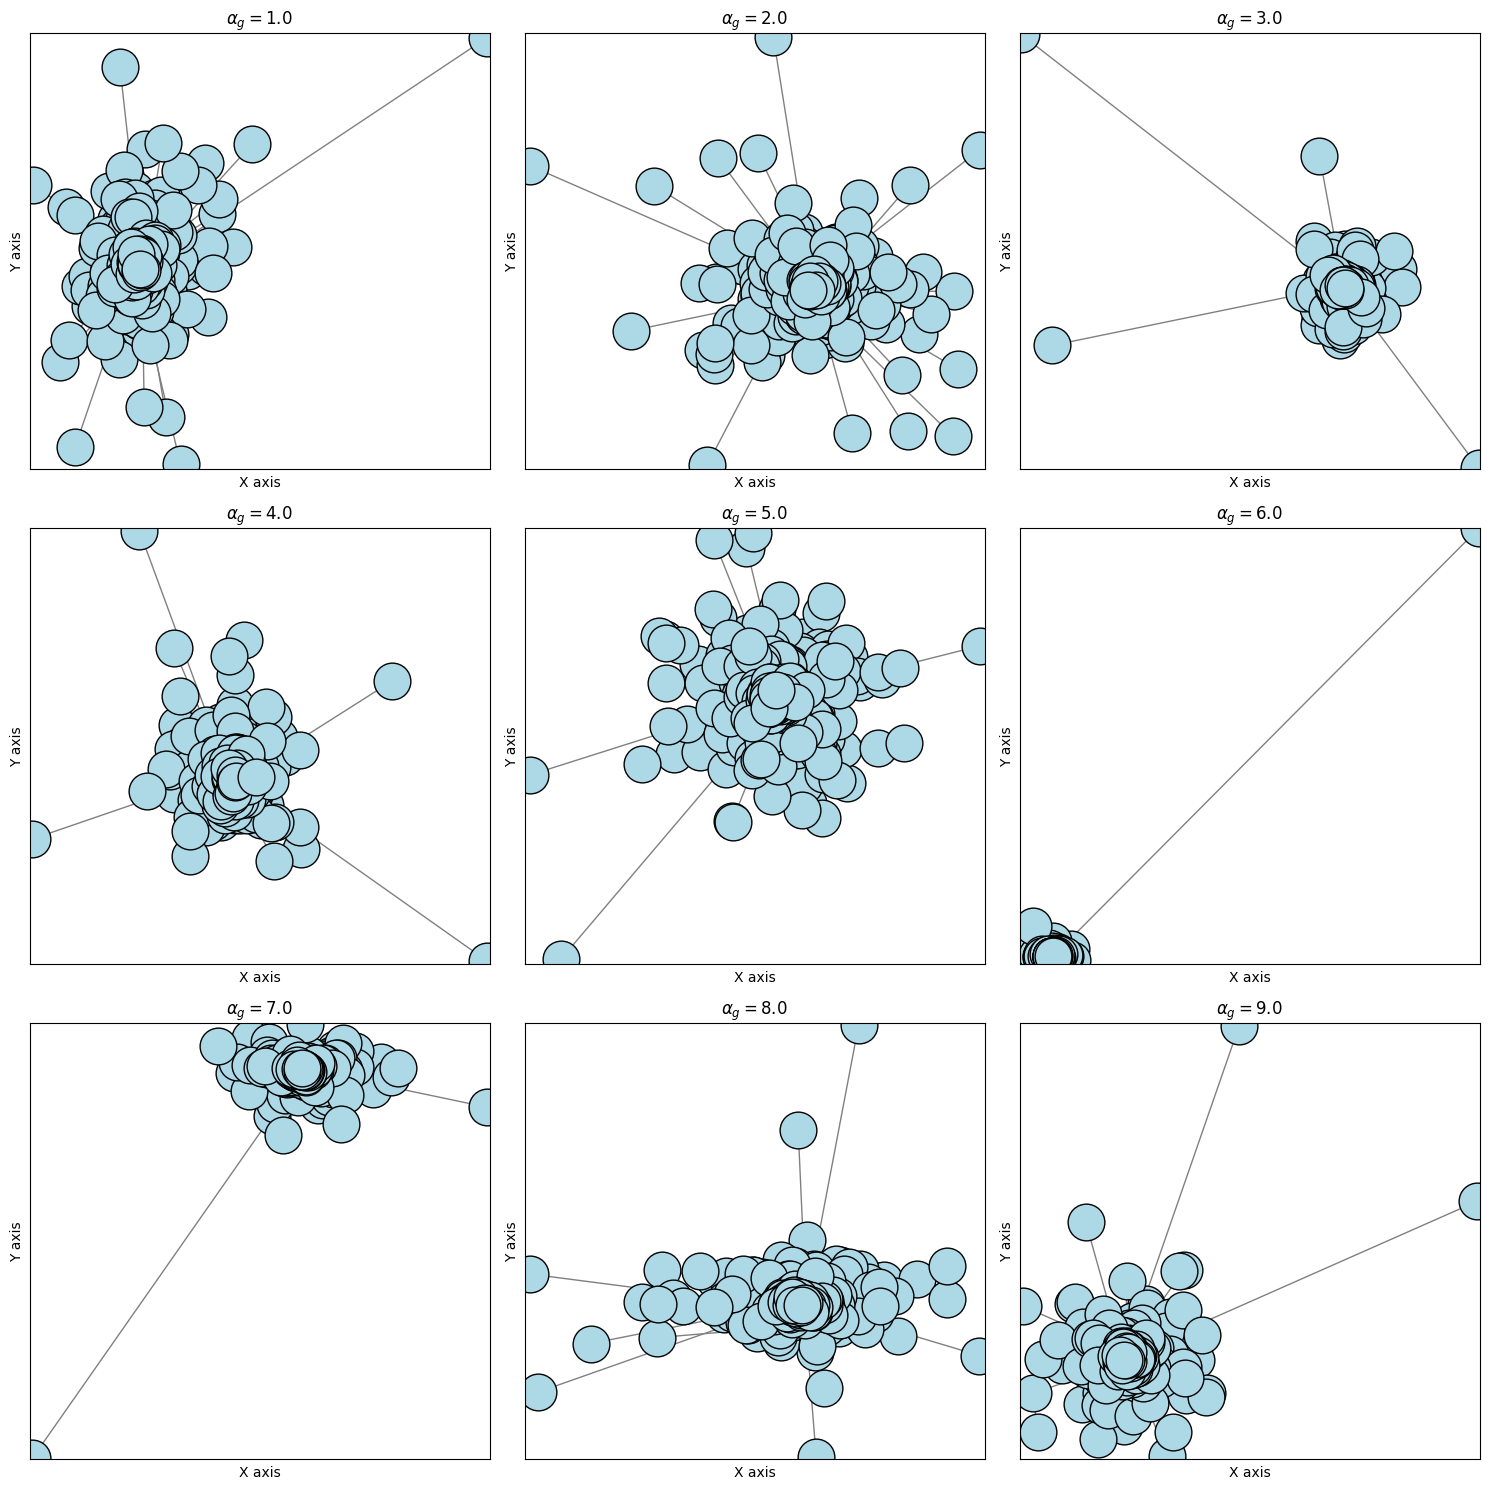

In [7]:
N = 10**4
alpha_g_f = 2.0
alpha_a_v = [0.0 ,1.0, 2.0,
           3.0, 4.0, 5.0, 
           6.0, 7.0, 8.0]
dim = 2
file_name = []
for aa in alpha_a:
    fn = select_first_gml_gz_file(N, dim, aa, alpha_g)
    file_name.append(fn)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Defina grafos e posições para cada subplot
graphs = []
positions = []
titles = []

N = 10**4
alpha_g_f = 2.0
alpha_a_v = [1.0 ,2.0, 3.0,
           4.0, 5.0, 6.0, 
           7.0, 8.0, 9.0]

dim = 2

for i in range(9):
    # Crie um grafo
    G = nx.Graph()
    fn = select_first_gml_gz_file(N, dim, alpha_a_v[i], alpha_g_f)
    edges, nodes_positions = positions_GML(N, dim, alpha_a_v[i], alpha_g,fn_f)
    
    # Adicione nós com as posições 2D extraídas das coordenadas 3D
    for node, pos in nodes_positions.items():
        # Apenas extraia as coordenadas x e y
        G.add_node(node, pos=(pos[0], pos[1]))

    pos = nx.get_node_attributes(G, 'pos')
    # Defina as arestas

    G.add_edges_from(edges)
    
    graphs.append(G)
    positions.append(pos)
    titles.append(rf'$\alpha_a =  {alpha_a_v[i]}$')

# Preencha cada subplot com um grafo
for ax, G, pos, title in zip(axs.flat, graphs, positions, titles):
    draw_graph(ax, G, pos, title)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostre o gráfico
plt.show()


In [4]:

import gzip
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Caminho do arquivo carregado
file_path = '../../data/N_80000/dim_2/alpha_a_2.0_alpha_g_2.0/gml/gml_94347500.gml.gz'


def read_gml_fallback(file_path):
    try:
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            return nx.read_gml(f)
    except nx.NetworkXError as e:
        print(f"Erro ao ler o arquivo GML: {e}")
        return None

# Caminho do arquivo carregado
file_path = '/mnt/data/gml_94347500.gml.gz'

# Tentar carregar o grafo
graph = read_gml_fallback(file_path)

if graph is not None:
    # Extraindo os graus dos nós e distâncias das arestas
    node_degrees = dict(graph.degree())
    edge_distances = [data['distance'] for u, v, data in graph.edges(data=True) if 'distance' in data]

    # Normalizar graus e distâncias para usar no degradê
    node_colors = np.array([node_degrees[node] for node in graph.nodes()])
    node_colors_normalized = (node_colors - node_colors.min()) / (node_colors.max() - node_colors.min())

    edge_weights = np.array(edge_distances)
    edge_weights_normalized = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min())

    # Definir os layouts
    pos = nx.spring_layout(graph)  # layout para a visualização

    # Plotando os nós com degradê baseado nos graus
    nodes = nx.draw_networkx_nodes(
        graph, pos, 
        node_color=node_colors_normalized, cmap=plt.cm.plasma, 
        node_size=100, alpha=0.8
    )

    # Plotando as arestas com degradê baseado nas distâncias
    edges = nx.draw_networkx_edges(
        graph, pos, 
        edge_color=edge_weights_normalized, edge_cmap=plt.cm.cool, 
        width=2, alpha=0.6
    )

    # Adicionando a barra de cores para os nós
    plt.colorbar(nodes, label="Grau dos Sítios")

    # Adicionando a barra de cores para as arestas
    plt.colorbar(edges, label="Distância das Ligações")

    # Exibir o gráfico
    plt.title("Rede com Degradê de Graus (Nós) e Distâncias (Arestas)")
    plt.show()
else:
    print("Erro ao processar o arquivo.")



NetworkXError: cannot tokenize (0) at (7, 4)